## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 讀取鳶尾花資料集
iris = datasets.load_iris()
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [2]:


# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# # 讀取鳶尾花資料集
# iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

print(iris.feature_names)

print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9777777777777777
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.01920966 0.         0.06358143 0.91720891]


In [3]:

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=4)

clf2 = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=None,
 max_features=None, max_leaf_nodes=None,
 min_impurity_decrease=1e-07, min_samples_leaf=1,
 min_samples_split=10, min_weight_fraction_leaf=0.2,
 presort=False, random_state=3, splitter='best')

clf2.fit(x_train, y_train)

y_pred = clf2.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

print(iris.feature_names)

print("Feature importance: ", clf2.feature_importances_) #不會,結果根本沒差

Acuuracy:  0.9777777777777777
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0. 0. 0. 1.]


In [45]:
pip install pydotplus

  Stored in directory: C:\Users\Jason\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


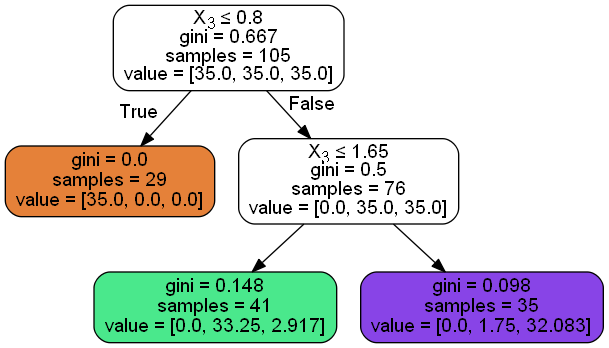

In [5]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [40]:
from sklearn import datasets, metrics
from sklearn.metrics import mean_squared_error

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# # 讀取Boston資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=4)

# 建立模型
clf = DecisionTreeRegressor()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

print(boston.feature_names)

print("Feature importance: ", clf.feature_importances_)

Mean squared error: 34.54
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [5.41323919e-02 1.87981422e-03 9.57264271e-04 6.30712256e-04
 1.42971205e-02 5.51031354e-01 1.29318659e-02 8.37197464e-02
 9.22326314e-05 1.20757011e-02 3.23970068e-02 9.50345432e-03
 2.26351335e-01]


In [43]:
from sklearn.linear_model import LinearRegression
# 建立模型
LR = LinearRegression()

# 訓練模型
LR.fit(x_train, y_train)

# 預測測試集
y_pred = LR.predict(x_test)

print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

#線性回歸較準

Mean squared error: 30.05
